IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en l emódulo de Tara 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [1]:
# Descarga de datos desde Kaggle

### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas comunas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

In [3]:
# Leemos todos los csv para tenerlos guardados.
# Este dataframe es el principal.
inf_general = pd.read_csv('bgg_GameItem.csv')
# Transformamos el dataframe de categoria a una lista de diccionarios para después usarlo.
inf_categoria = pd.read_csv('bgg_Category.csv').to_dict('records')
inf_familia = pd.read_csv('bgg_GameFamily.csv').to_dict('records')
inf_tipo = pd.read_csv('bgg_GameType.csv').to_dict('records')
inf_mecanicas = pd.read_csv('bgg_Mechanic.csv').to_dict('records')
inf_personas = pd.read_csv('bgg_Person.csv').to_dict('records')
inf_editorial = pd.read_csv('bgg_Publisher.csv').to_dict('records')

# Creamos un diccionario de los datos con llave el str del id del dato a ver y de valor su nombre
# para ahorrar tiempo, cambiamos a str ya que después le hago un split a los ids de los datos
# de el dataframe principal lo que los cambia a str.
diccionario_por_id_categoria = {str(indice['bgg_id']): indice['name'] for indice in inf_categoria}
diccionario_por_id_familia = {str(indice['bgg_id']): indice['name'] for indice in inf_familia}
diccionario_por_id_tipo = {str(indice['bgg_id']): indice['name'] for indice in inf_tipo}
diccionario_por_id_mecanicas = {str(indice['bgg_id']): indice['name'] for indice in inf_mecanicas}
diccionario_por_id_personas = {str(indice['bgg_id']): indice['name'] for indice in inf_personas}
diccionario_por_id_editorial = {str(indice['bgg_id']): indice['name'] for indice in inf_editorial}
# Creo un diccionario de los diccionarios para poder buscar por llave el diccionario que necesito
diccionarios_por_id = {
    'category': diccionario_por_id_categoria,
    'family': diccionario_por_id_familia,
    'game_type': diccionario_por_id_tipo,
    'mechanic': diccionario_por_id_mecanicas,
    'person': diccionario_por_id_personas,
    'publisher': diccionario_por_id_editorial
}
# Creo una funcion para poder crear una lista según el dato que necesite para después poder crear un dataframe de esa lista
def cambiar(especialidad):
    filas = []
    for id_especialidad in inf_general[especialidad]:
        # Si el dato es NaN lo dejamos igual
        if type(id_especialidad) == float:
            filas.append(id_especialidad)
        else:
            ids_separados = id_especialidad.split(',')
            for x in range(len(ids_separados)):
                if especialidad == 'designer' or especialidad == 'artist':
                    ids_separados[x] = diccionarios_por_id['person'][ids_separados[x]]
                else:
                    ids_separados[x] = diccionarios_por_id[especialidad][ids_separados[x]]
            filas.append(ids_separados)
    return filas
# Creamos un dataframe para intercambiar cada columna de datos repectiva en el dataframe principal
columna_categorias = pd.DataFrame({'category': cambiar('category')})
columna_familia = pd.DataFrame({'family': cambiar('family')})
columna_tipo = pd.DataFrame({'type': cambiar('game_type')})
columna_mecanicas = pd.DataFrame({'mechanic': cambiar('mechanic')})
columna_designer = pd.DataFrame({'designer': cambiar('designer')})
columna_artist = pd.DataFrame({'artist': cambiar('artist')})
columna_editorial = pd.DataFrame({'publisher': cambiar('publisher')})

inf_general['category'] = columna_categorias['category']
inf_general['family'] = columna_familia['family']
inf_general['game_type'] = columna_tipo['type']
inf_general['mechanic'] = columna_mecanicas['mechanic']
inf_general['designer'] = columna_designer['designer']
inf_general['artist'] = columna_artist['artist']
inf_general['publisher'] = columna_editorial['publisher']
# Guardamos el dataframe con los datos mostrados
inf_general.to_csv('bgg_InfoGames.csv')

inf_general

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
0,1,Die Macher,1986.0,[Strategy Game],[Karl-Heinz Schmiel],"[Marcus Gschwendtner, Harald Lieske]","[Hans im Glück, Moskito Spiele, Ediciones MasQ...",3.0,5.0,4.0,...,1.57510,7.06367,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dragonmaster,1981.0,[Strategy Game],"[G. W. ""Jerry"" D'Arcey]",[Bob Pepper],"[E.S. Lowe, Milton Bradley]",3.0,4.0,3.0,...,1.46752,5.76599,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Samurai,1998.0,[Strategy Game],[Reiner Knizia],[Franz Vohwinkel],"[Fantasy Flight Games, Hans im Glück, 999 Game...",2.0,4.0,2.0,...,1.19279,7.22869,2.4784,1.006579,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tal der Könige,1992.0,[Strategy Game],[Christian Beierer],[Thomas di Paolo],[KOSMOS],2.0,4.0,2.0,...,1.23667,5.66660,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acquire,1964.0,[Strategy Game],[Sid Sackson],"[Scott Okumura, Peter Whitley]","[3M, The Avalon Hill Game Co, Avalon Hill, Duj...",2.0,6.0,3.0,...,1.33603,7.12541,2.4985,1.095890,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113899,391565,Champions!,2023.0,NaN,"[Frank Crittin, Grégoire Largey, Sébastien Pau...",NaN,"[Repos Production, Hobby Japan]",3.0,8.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113900,391715,Leitin að stjörnunni,2022.0,NaN,"[Sigurrós Nadía, Valþór Örn Sverrisson, Alexan...",NaN,[Pb box ehf.],2.0,20.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113901,391720,The String Railway Collection,2024.0,NaN,[Hisashi Hayashi],[Archie Edwards],[Play For Keeps],2.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113902,391834,SpellBook,2023.0,NaN,[Phil Walker-Harding],[Cyrille Bertin],[Space Cowboys],1.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



- El dataframe guardado ocupa 33.547 KB, mientras que los otros csv pesan 2 KB - 166 KB - 15.701 KB - 1 KB - 5 KB - 1.135 KB - 583 KB, teniendo en total 17.593 KB de informacion en conjunto, esta diferencia ocurre debido a que los datos almacenados por ejemplo en el de tipo de juego de tamaño 1 KB se menciona tan solo 12 tipos de juego, pero en el dataframe principal hay cerca de 113 mil juegos distintos, por lo que esos 1 KB de datos aplicados a el dataframe principal pasan a ser miles de KB, así repitiendose en los demás datos de los csv.

### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?


In [4]:
# Cargo el csv que creé para el dataframe con todos los datos
inf_total = pd.read_csv('bgg_InfoGames.csv')
# Buscando una forma para ignorar los valores que no son validos,
# en https://stackoverflow.com/questions/44681776/ignoring-nan-in-a-dataframe
# está esta forma a continuación:
dataframe_limpio = inf_total.dropna(subset=['year'])
# Guardando el dataframe con la columna de 'year' limpia de valores inválidos

# Buscamos el rango de los años que están
print(int(max(dataframe_limpio['year'])))
print(int(min(dataframe_limpio['year'])))

2026
-3500


- *Según el rango de años de -3500 a 2026, se aprecia claramente que no tiene ningún sentido, más que nada el año -3500, ¿a qué se referirá?, ni idea, incluso del año 2026, ¿ya ven en el futuro o que?.

**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

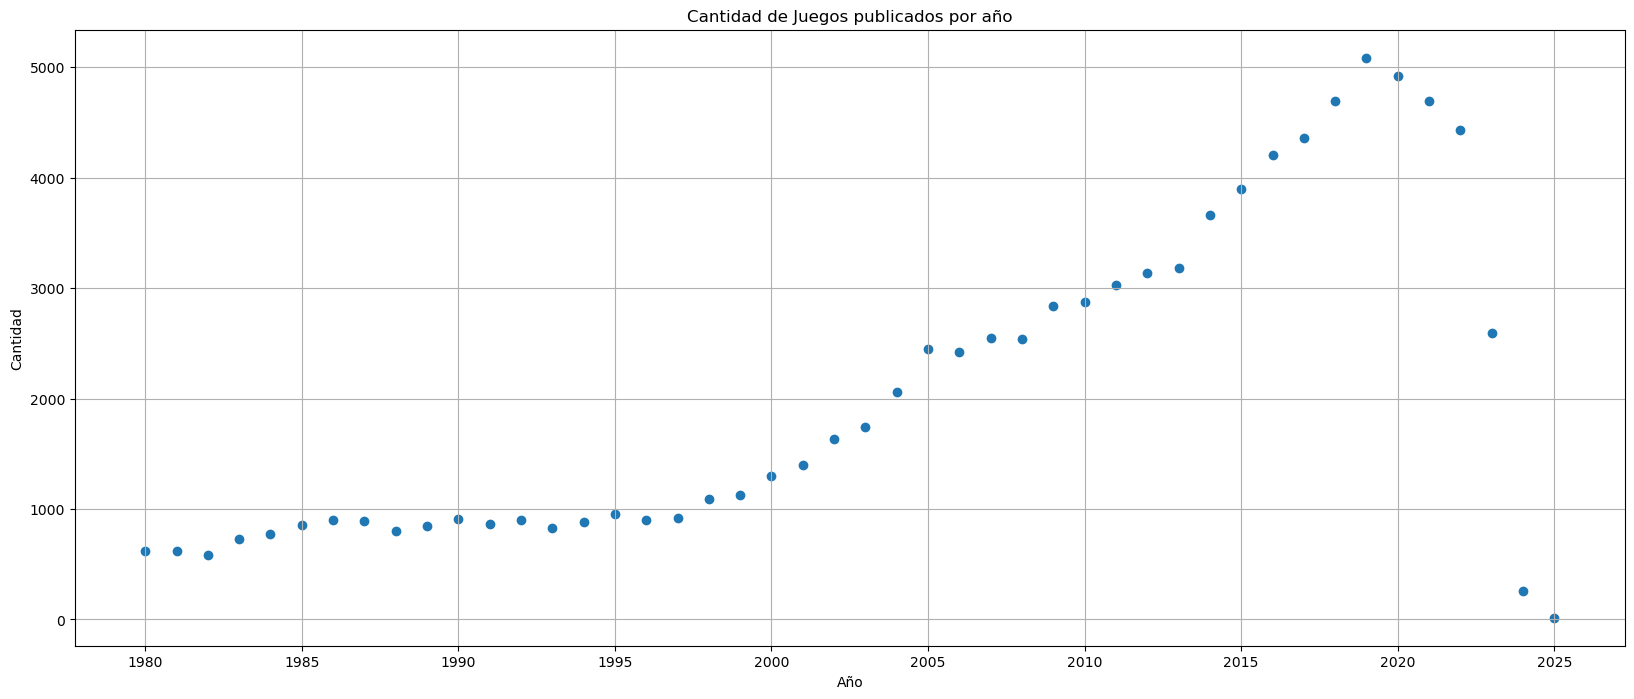

In [5]:
# Filtramos por fecha
dataframe_mayor_fecha = dataframe_limpio[dataframe_limpio['year'] >= 1980]
dataframe_entre_fechas = dataframe_mayor_fecha[dataframe_mayor_fecha['year'] <= 2025]
# Consideramos solo las fechas y un dato para contar la cantidad para poder agruparlos
relacion_id_year = dataframe_entre_fechas[['bgg_id','year']]
relacion_id_year = relacion_id_year.groupby('year').count()
# Y graficamos
plt.figure(figsize=(20, 8))
grafico = plt.scatter(relacion_id_year.index, relacion_id_year['bgg_id'])
plt.title('Cantidad de Juegos publicados por año')
plt.locator_params(axis='x', nbins=10)
plt.xlabel('Año')
plt.grid(True)
plt.ylabel('Cantidad')
plt.show()


- *Observamos que las publicaciones de juegos desde que se empezaron a registrar en 1980 se mantuvo cerca de los 1000 juegos por año hasta el año 2000, desde este, estuvo en aumento hasta el 2020 desde el cual hubo una caída abrupta hasta el año actual*

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

In [6]:
# Creamos una nueva columna con el nombre aumento_anual y le agregamos como valor
# la diferencia de la columna principal por la anterior con un intervalo de 1 con la funcion diff
# https://stackoverflow.com/questions/72008057/calculate-different-between-rows-with-pandas-diff
relacion_id_year['aumento_anual'] = relacion_id_year['bgg_id'].diff(1)
# Revisamos la columna
relacion_id_year

,bgg_id,aumento_anual
year,,
1980.0,617,NaN
1981.0,623,6.0
1982.0,586,-37.0
1983.0,733,147.0
1984.0,777,44.0
1985.0,855,78.0
1986.0,899,44.0
1987.0,889,-10.0
1988.0,803,-86.0


- *Podemos ver que el mayor aumento de juegos producidos fue en el año 2014 dado que desde el año anterior se producieron 484 juegos de mesa*

### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

In [7]:
# Limpiamos datos primero
df_limpio = dataframe_entre_fechas.dropna(subset=('min_time','max_time','complexity'))
# Mi criterio es como máximo 1800 segundos minimos ya que los tiempos mayores a este la diferencia era demasiada
df_limpio_filtrado = df_limpio[df_limpio['min_time'] <= 1800]
# El segundo criterio es máximo 6000 segundos maximos lo que equivalen a 1 hora y 40 minutos, después de este, los tiempos saltan abruptamente
# de 6000 a 7500 o 9000
df_limpio_filtrado = df_limpio_filtrado[df_limpio_filtrado['max_time'] <= 6000]
df_limpio_filtrado


,Unnamed: 0,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
0,0,1,Die Macher,1986.0,['Strategy Game'],['Karl-Heinz Schmiel'],"['Marcus Gschwendtner', 'Harald Lieske']","['Hans im Glück', 'Moskito Spiele', 'Ediciones...",3.0,5.0,...,1.575100,7.06367,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Dragonmaster,1981.0,['Strategy Game'],"['G. W. ""Jerry"" D\'Arcey']",['Bob Pepper'],"['E.S. Lowe', 'Milton Bradley']",3.0,4.0,...,1.467520,5.76599,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,Samurai,1998.0,['Strategy Game'],['Reiner Knizia'],['Franz Vohwinkel'],"['Fantasy Flight Games', 'Hans im Glück', '999...",2.0,4.0,...,1.192790,7.22869,2.4784,1.006579,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,Tal der Könige,1992.0,['Strategy Game'],['Christian Beierer'],['Thomas di Paolo'],['KOSMOS'],2.0,4.0,...,1.236670,5.66660,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,6,Mare Mediterraneum,1989.0,NaN,['Jean du Poël'],['Jean du Poël'],['Historien Spiele Galerie (Historien Spielega...,2.0,6.0,...,1.662850,5.54166,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113841,113841,389817,Route 66: Get Your Tricks,2023.0,NaN,['J Simmons'],['J Simmons'],['(Self-Published)'],2.0,2.0,...,NaN,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113848,113848,389997,Bakhmut Meatgrinder: Verdun 2023,2023.0,NaN,['Lou Coatney'],NaN,['(Self-Published)'],1.0,6.0,...,NaN,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113855,113855,390199,Space Privateer Command,2022.0,NaN,['Kelvin Soong'],NaN,['Kealf Games'],1.0,1.0,...,NaN,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113876,113876,390607,Great Kingdom,2023.0,NaN,['Lee Sedol'],NaN,"['Korea Boardgames Co., Ltd.']",2.0,2.0,...,0.829156,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

In [8]:
# Calculamos el tiempo promedio
df_limpio_filtrado['avg_time'] = (df_limpio_filtrado['min_time']*df_limpio_filtrado['max_time'])/2
df_limpio_filtrado['avg_time']

0         28800.0
1           450.0
2           900.0
3          1800.0
5         28800.0
           ...   
113841      375.0
113848     3600.0
113855     2400.0
113876      200.0
113889     6750.0
Name: avg_time, Length: 39520, dtype: float64

**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

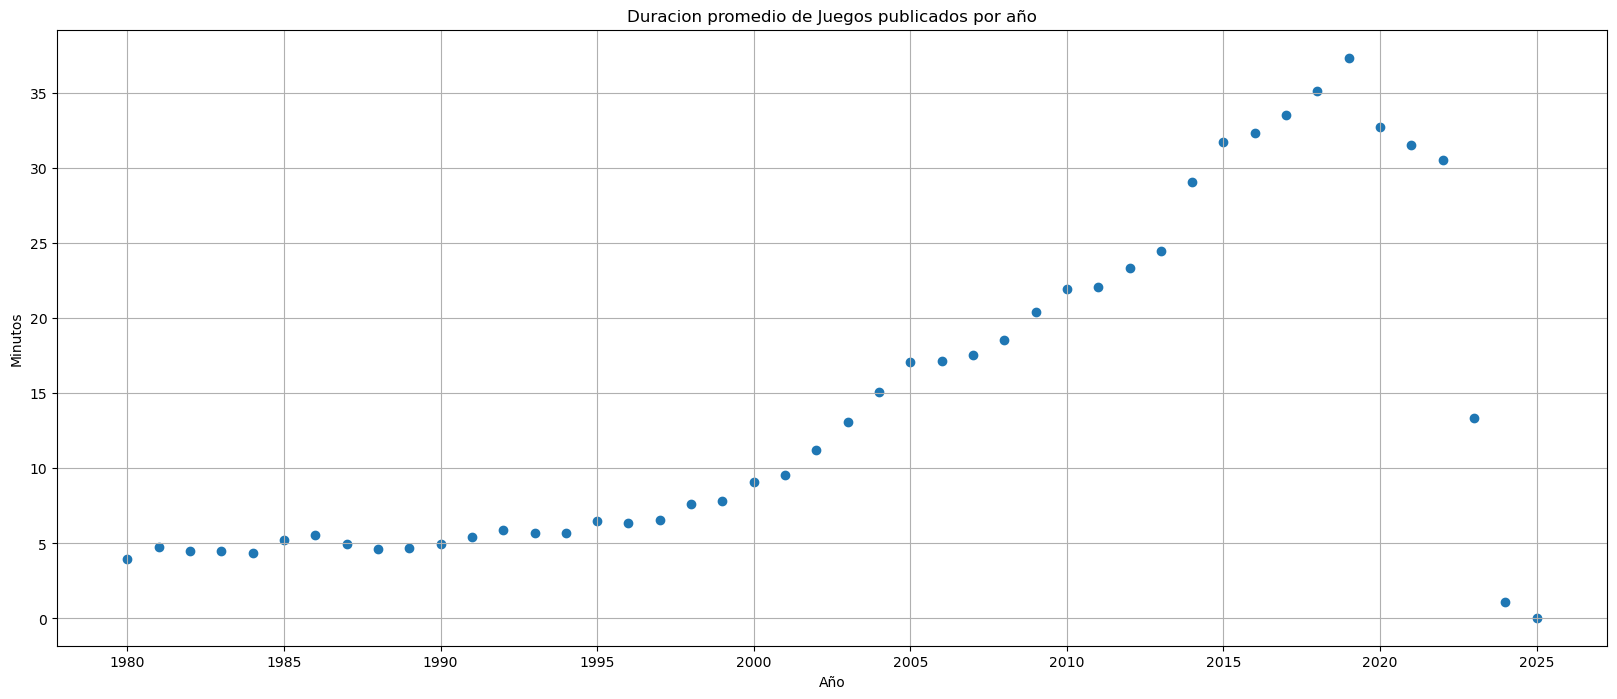

In [9]:
relacion_year_avg_time = df_limpio_filtrado[['year','avg_time']]
relacion_year_avg_time = relacion_year_avg_time.groupby('year').count()
plt.figure(figsize=(20, 8))
grafico = plt.scatter(relacion_year_avg_time.index, relacion_year_avg_time['avg_time']/60)
plt.title('Duracion promedio de Juegos publicados por año')
plt.locator_params(axis='x', nbins=10)
plt.xlabel('Año')
plt.grid(True)
plt.ylabel('Minutos')
plt.show()

- *Totalmente existe una tendencia, desde un poco antes del 1995 la duración promedio era de 5 minutos a lo máximo, pero de ahí en adelante el tiempo promedio que requeria para jugar a los juegos de mesa escaló bastante, pero ya tuvo una caida abrupta desde el 2020.

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

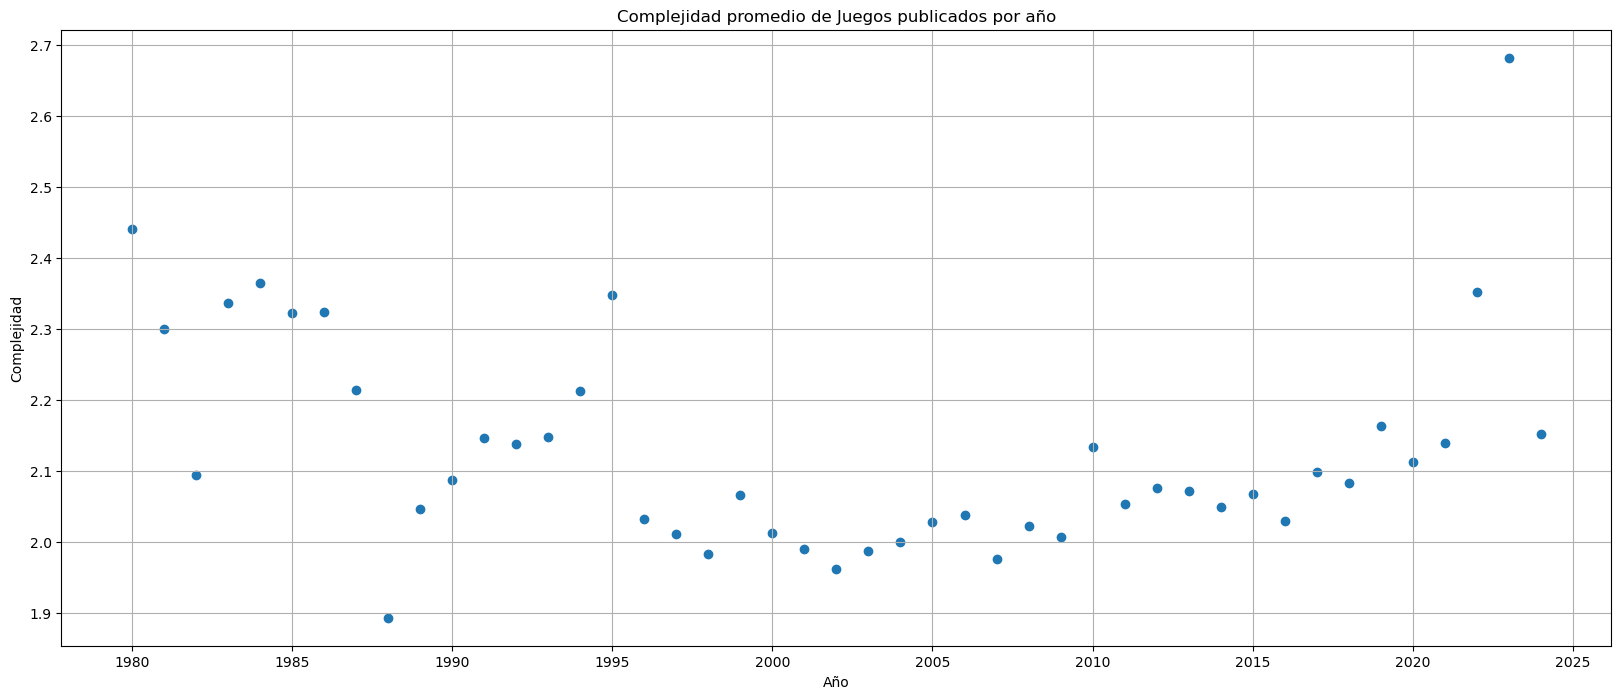

In [14]:
# Filtramos por la cantidad de votos que ha tenido cada juego
relacion_year_complexity = df_limpio_filtrado[df_limpio_filtrado['num_votes'] >= 100]
# La función mean() de groupby() te da el promedio de los valores juntados de alguna columna en especifico
# https://stackoverflow.com/questions/69487862/pandas-how-to-get-the-mean-after-group-by
relacion_year_complexity = relacion_year_complexity[['year','complexity']].groupby('year').mean()
plt.figure(figsize=(20, 8))
grafico = plt.scatter(relacion_year_complexity.index, relacion_year_complexity['complexity'])
plt.title('Complejidad promedio de Juegos publicados por año')
plt.locator_params(axis='x', nbins=10)
plt.xlabel('Año')
plt.grid(True)
plt.ylabel('Complejidad')
plt.show()

- *Erróneamente se podría creer que por el gráfico hay mayor complejidad en los juegos antes del año 2000, pero también se debe considerar que antes del año 2000 habían menos juegos producidos que en fechas más recientes, bajando así la dependencia del promedio, NO podemos asegurar que la noción de complejidad antes del año 2000 sea mayor a la actual.*

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

In [11]:
# Consideramos el dataframe entre las fechas ya cargadas y limpiamos
df_a_evaluar = dataframe_entre_fechas[['year', 'category']].dropna(subset='category')
# Creo un diccionario con las categorias como llave y de valor empezando en 0
diccionario_categoria = {categoria: 0 for categoria in diccionario_por_id_categoria.values()}
# Iteramos sobre el dataframe requerido
for categorias in df_a_evaluar['category']:
    for categoria in diccionario_categoria.keys():
        # Revisamos en caso de que se encuentre la categoria y si es así le sumamos al diccionario
        if categoria in categorias:
            diccionario_categoria[categoria] += 1
# Convertimos el diccionario a dataframe
dataframe_categorias_cantidad = pd.DataFrame(list(diccionario_categoria.items()), columns=['categoria','cantidad'])
# Y finalmente ordenamos
dataframe_categorias_cantidad = dataframe_categorias_cantidad.sort_values('cantidad', ascending=False)
dataframe_top5_categorias = dataframe_categorias_cantidad.head(5)
dataframe_top5_categorias

,categoria,cantidad
1,Card Game,25900
10,Wargame,12502
32,Children's Game,11706
21,Party Game,9574
4,Fantasy,8358


- *Estos serían las 5 principales categorias de juegos más comunes desde el 1980 hasta la actualidad*

**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

In [12]:
# Listamos las categorias para iterar sobre ellas
lista_categorias = list(dataframe_top5_categorias['categoria'])
# Limpiamos dataframe que no tenga categoria
df_year_category = dataframe_entre_fechas.dropna(subset='category')[['year','category']]
# Para poder ver si la categoría se encontraba busqué en stackoverflow y encontré el metodo .apply()
# https://stackoverflow.com/questions/32280556/how-to-filter-a-dataframe-column-of-lists-for-those-that-contain-a-certain-item
df_card_game = df_year_category[df_year_category['category'].apply(lambda x: lista_categorias[0] in x)]
# Cambiamos el nombre de las columnas
df_card_game.columns = ['year', 'cantidad']
# Agrupamos por año la cantidad de veces
df_card_game = df_card_game.groupby('year').count()
# Repetimos con los demás
df_wargame = df_year_category[df_year_category['category'].apply(lambda x: lista_categorias[1] in x)]
df_wargame.columns = ['year', 'cantidad']
df_wargame = df_wargame.groupby('year').count()

df_children_game = df_year_category[df_year_category['category'].apply(lambda x: lista_categorias[2] in x)]
df_children_game.columns = ['year', 'cantidad']
df_children_game = df_children_game.groupby('year').count()

df_party_game = df_year_category[df_year_category['category'].apply(lambda x: lista_categorias[3] in x)]
df_party_game.columns = ['year', 'cantidad']
df_party_game = df_party_game.groupby('year').count()

df_fantasy = df_year_category[df_year_category['category'].apply(lambda x: lista_categorias[4] in x)]
df_fantasy.columns = ['year', 'cantidad']
df_fantasy = df_fantasy.groupby('year').count()
# Creamos un dataframe único con los años y categorias y la cantidad de estos por año
df_total = df_card_game.rename(columns={"cantidad": "Card Game"})
df_total = df_total.join(df_wargame.rename(columns={"cantidad": "Wargame"}))
df_total = df_total.join(df_children_game.rename(columns={"cantidad": "Children's Game"}))
df_total = df_total.join(df_party_game.rename(columns={"cantidad": "Party Game"}))
df_total = df_total.join(df_fantasy.rename(columns={"cantidad": "Fantasy"}))
df_total

,Card Game,Wargame,Children's Game,Party Game,Fantasy
year,,,,,
1980.0,43,170,75.0,8.0,33
1981.0,52,181,76.0,11.0,40
1982.0,58,140,60.0,11.0,30
1983.0,86,177,106.0,16.0,41
1984.0,70,133,122.0,32.0,38
1985.0,64,131,108.0,61.0,42
1986.0,66,156,121.0,53.0,41
1987.0,78,120,111.0,62.0,38
1988.0,85,108,145.0,84.0,23


**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


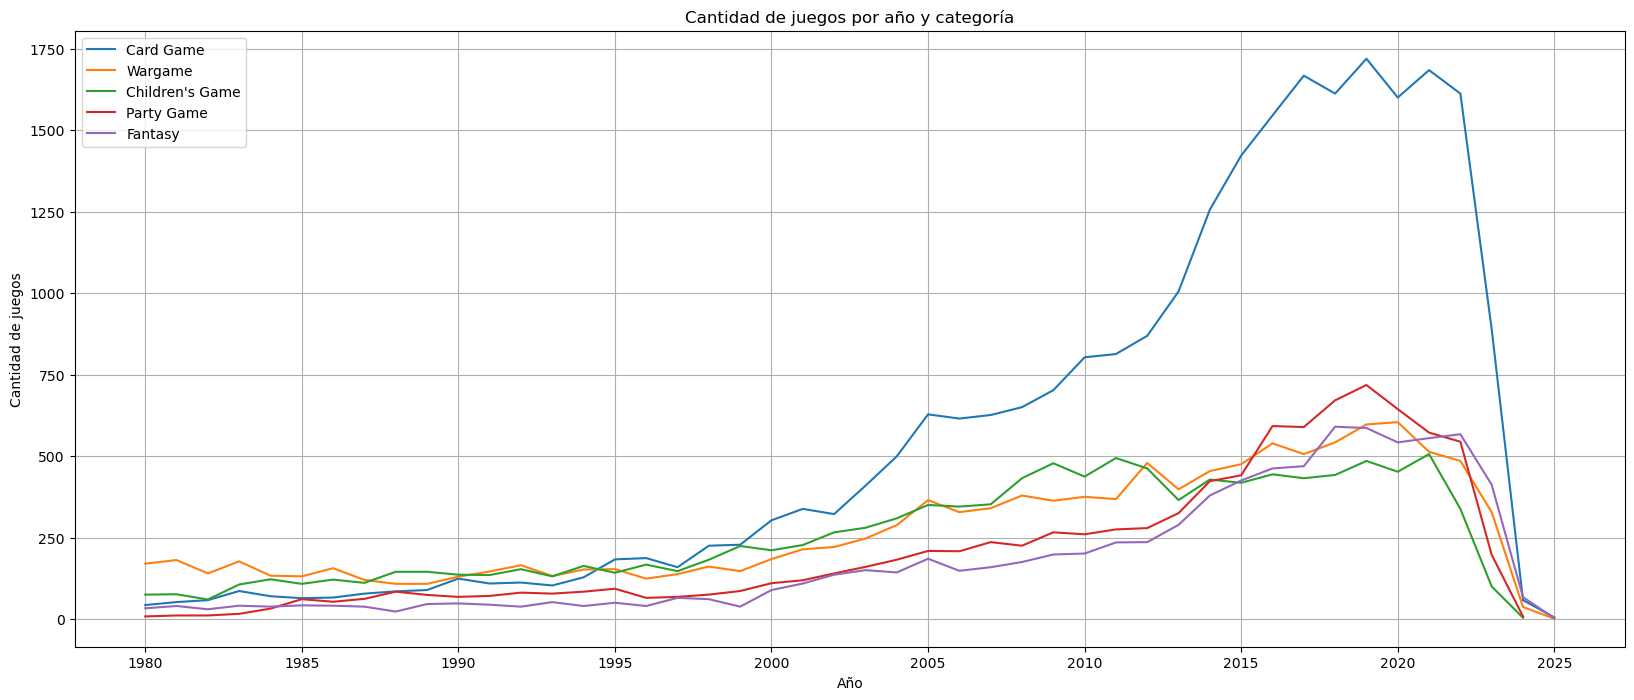

In [13]:
# Simplemente Graficamos
plt.figure(figsize=(20, 8))
for columna in df_total.columns:
    plt.plot(df_total.index, df_total[columna], label=columna)
plt.xlabel("Año")
plt.locator_params(axis='x', nbins=10)
plt.ylabel("Cantidad de juegos")
plt.title("Cantidad de juegos por año y categoría")
plt.legend()
plt.grid(True)
plt.show()

### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?

- *Para mí, no encontré ninguna limitación o problema, simplemente había que filtrar los datos, y considerar datos coherentes, no como el juego publicado/desarrollado en le año -3500, ese sería mi visión sobre los datos presentes, incluso para mayor torpeza mía, realicé un disard all changes a mi repositorio y felizmente me di cuenta que borré bastante progreso mio, asi que espero que no me vuelva a pasar, un saludo*